In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import cartopy.crs as ccrs
import cartopy.feature as cfeature

df = pd.read_csv("ENTC_ENGM_actual.csv")

df

df['Time_Over'].str.split(' ')

split_date = df['Time_Over'].str.split(' ', expand = True)
split_date.rename(columns={0:'date',1:'hour'})

df = pd.read_csv("ENTC_ENGM_actual.csv")
df

df['Time_Over'] = pd.to_datetime(df['Time_Over'])
df['date'] = df['Time_Over'].dt.date
df['time'] = df['Time_Over'].dt.time
df = df.drop(columns=['Time_Over'])
df.to_csv('ENTC_ENGM_actual_modified.csv', index=False)

In [3]:
df = pd.read_csv('ENTC_ENGM_actual_modified.csv')
df.head(15)

ECTRL_ID  Nr_Crt  Sequence_Number      time  Flight_Level  Latitude  \
0   246013605       1                0  23:41:00             0  69.68139   
1   246013605       1                1  23:51:00             0  69.68139   
2   246013605       1                2  23:53:00            67  69.57583   
3   246013605       1                3  23:56:00           152  69.33083   
4   246013605       1                4  00:01:00           246  68.89639   
5   246013605       1                5  00:11:00           332  67.87500   
6   246013605       1                6  00:30:00           360  65.77333   
7   246013605       1                7  00:44:00           360  63.97750   
8   246013605       1                8  00:49:00           360  63.34917   
9   246013605       1                9  00:58:00           360  62.00000   
10  246013605       1               10  01:01:00           360  61.60528   
11  246013605       1               11  01:13:00            90  60.19167   
12  246013605       1               12  01:17:00            48  60.02639   
13  246013605       1               13  01:19:00            26  60.07695   
14  246013605       1               14  01:22:00             0  60.20278   

    Longitude        date  
0    18.91778  31.08.2021  
1    18.91778  31.08.2021  
2    18.84778  31.08.2021  
3    18.48611  31.08.2021  
4    17.95556  09.01.2021  
5    16.44139  09.01.2021  
6    13.94472  09.01.2021  
7    12.32139  09.01.2021  
8    11.80500  09.01.2021  
9    11.94028  09.01.2021  
10   11.64722  09.01.2021  
11   11.07445  09.01.2021  
12   11.14472  09.01.2021  
13   11.01111  09.01.2021  
14   11.08389  09.01.2021

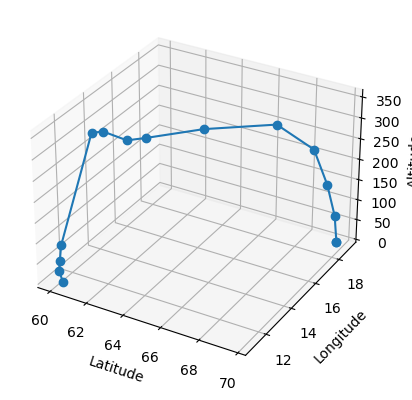

In [4]:
x = df.head(15)['Latitude'].tolist()
y = df.head(15)['Longitude'].tolist()
z = df.head(15)['Flight_Level'].tolist()

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the flight path
ax.plot(x, y, z, marker='o', linestyle='-')

# Set labels for each axis
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Altitude')

# Show the plot
plt.show()


/Users/ioanvalentinvisinescu/anaconda3/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1696: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  result = super().scatter(*args, **kwargs)


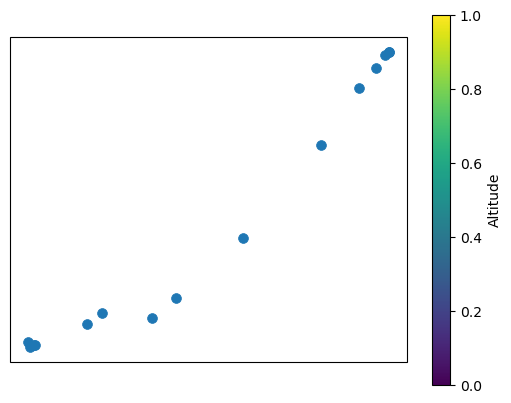

In [5]:
x = df.head(15)['Latitude'].tolist()
y = df.head(15)['Longitude'].tolist()
#z = df['Flight_Level'].tolist()
sq_no = df['Sequence_Number'].tolist()
colors = plt.cm.viridis(np.linspace(0, 1, len(sq_no)))

# Create a Cartopy plot
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the flight path with colors
sc = ax.scatter(x, y, cmap='viridis', s=50, marker='o', linestyle = '-', linewidth=0.5)

# Add colorbar
cbar = plt.colorbar(sc, ax=ax, label='Altitude')

# Set labels for each axis
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


# ax.set_xlabel('Latitude')
# ax.set_ylabel('Longitude')
# ax.coastlines()
# plt.show()

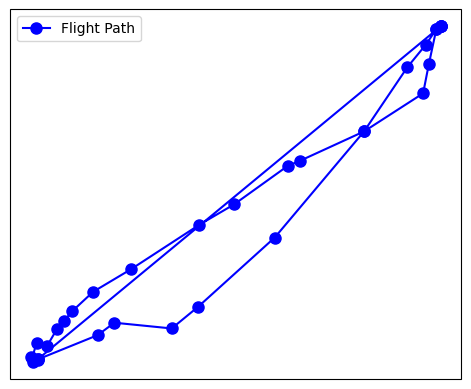

In [5]:
#doar prima traiectorie
x = df.head(34)['Latitude'].tolist()
y = df.head(34)['Longitude'].tolist()

# x = df['Latitude'].tolist()
# y = df['Longitude'].tolist()

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
#ax.set_extent([4, 32, 57, 71], crs=ccrs.PlateCarree()) - afiseaza harta
col = (np.random.random(), np.random.random(), np.random.random())

# Plot the flight path with lines
ax.plot(x, y, marker='o', linestyle='-', color="blue", markersize=8, label='Flight Path')
#ax.plot(x, y, marker='o', linestyle='-', color=col, markersize=8, label='Flight Path') - random colors for lines


# Add country borders for reference
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1, edgecolor='black')

# Set labels for each axis
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a legend
ax.legend()

# Show the plot
plt.show()

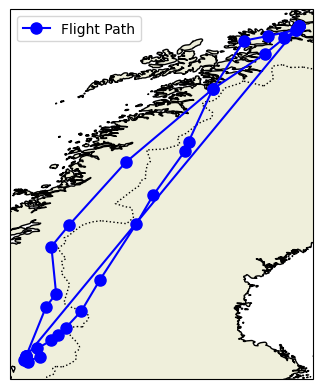

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

# Assuming your DataFrame is already loaded and contains columns 'Latitude' and 'Longitude'
# Modify column names based on your actual dataset
x = df.head(34)['Latitude'].tolist()
y = df.head(34)['Longitude'].tolist()

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
col = (np.random.random(), np.random.random(), np.random.random())

# Plot the flight path with lines
ax.plot(y, x, marker='o', linestyle='-', color="blue", markersize=8, label='Flight Path')

# Add country borders for reference
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1, edgecolor='black')

# Set labels for each axis
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a legend
ax.legend()

# Show the plot
plt.show()


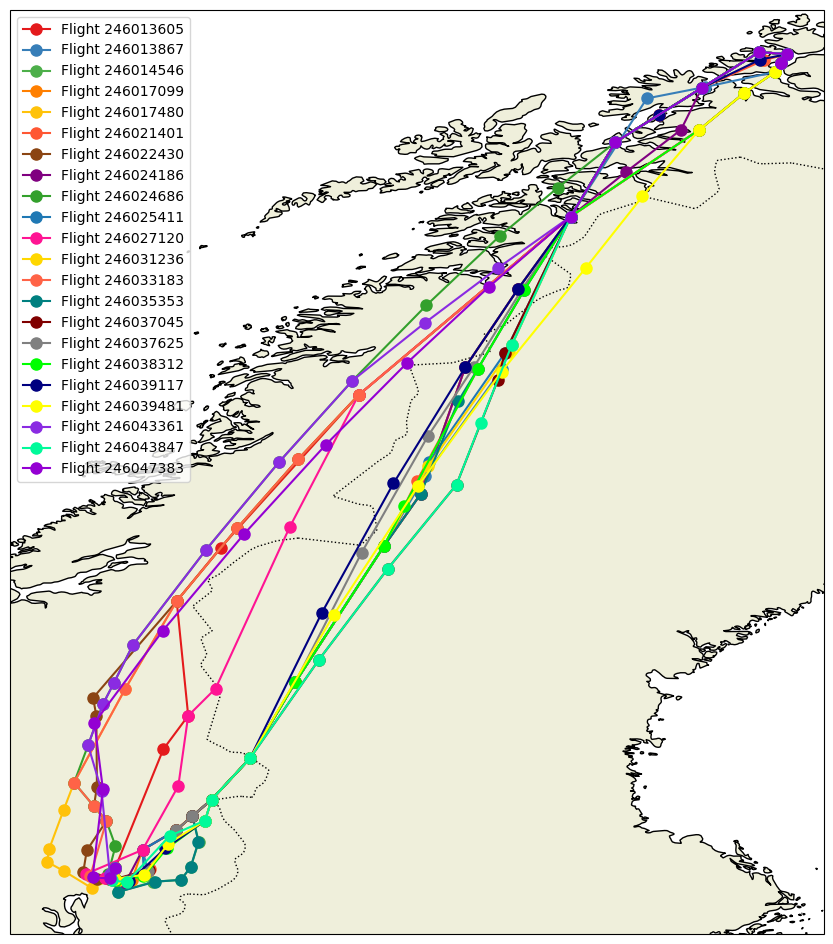

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

# Assuming your DataFrame is already loaded and contains columns 'Latitude' and 'Longitude'
# Modify column names based on your actual dataset
df_list = [df[df['ECTRL_ID'] == flight] for flight in df['ECTRL_ID'].unique()]

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(16,12))

# Define a list of colors for each trajectory
#colors = plt.cm.viridis(np.linspace(0, 1, len(df_list)))
distinct_colors = [
    '#E41A1C', '#377EB8', '#4DAF4A', '#FF7F00', '#FFC20A',
    '#FF5733', '#8B4513', '#800080', '#33A02C', '#1F78B4',
    '#FF1493', '#FFD700', '#FF6347', '#008080', '#800000',
    '#808080', '#00FF00', '#000080', '#FFFF00', '#8A2BE2',
    '#00FA9A', '#9400D3', '#20B2AA'
]
# Plot each trajectory with a different color
for i, flight_df in enumerate(df_list):
    x = flight_df['Latitude'].tolist()
    y = flight_df['Longitude'].tolist()
    col = distinct_colors[i % len(distinct_colors)]  # Cycle through colors if more trajectories than colors
    flight_number = flight_df['ECTRL_ID'].iloc[0]  # Take the first flight number in the group
    ax.plot(y, x, marker='o', linestyle='-', color=col, markersize=8, label=f'Flight {flight_number}')


# Add country borders for reference
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1, edgecolor='black')

# Set labels for each axis
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a legend
ax.legend()

# Show the plot
plt.show()



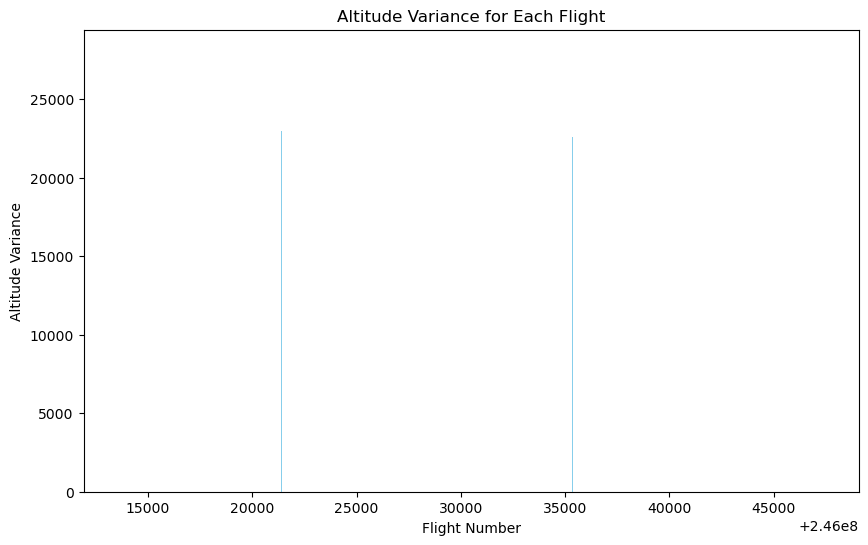

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is already loaded and contains columns 'flight number' and 'altitude'
# Modify column names based on your actual dataset
df = pd.read_csv('ENTC_ENGM_actual_modified.csv')

# Group by 'flight number' and calculate the variance of 'altitude' for each flight
variance_data = df.groupby('ECTRL_ID')['Flight_Level'].var().reset_index()

# Plot the altitude variance for each flight
plt.figure(figsize=(10, 6))
plt.bar(variance_data['ECTRL_ID'], variance_data['Flight_Level'], color='skyblue')
plt.xlabel('Flight Number')
plt.ylabel('Altitude Variance')
plt.title('Altitude Variance for Each Flight')
plt.show()



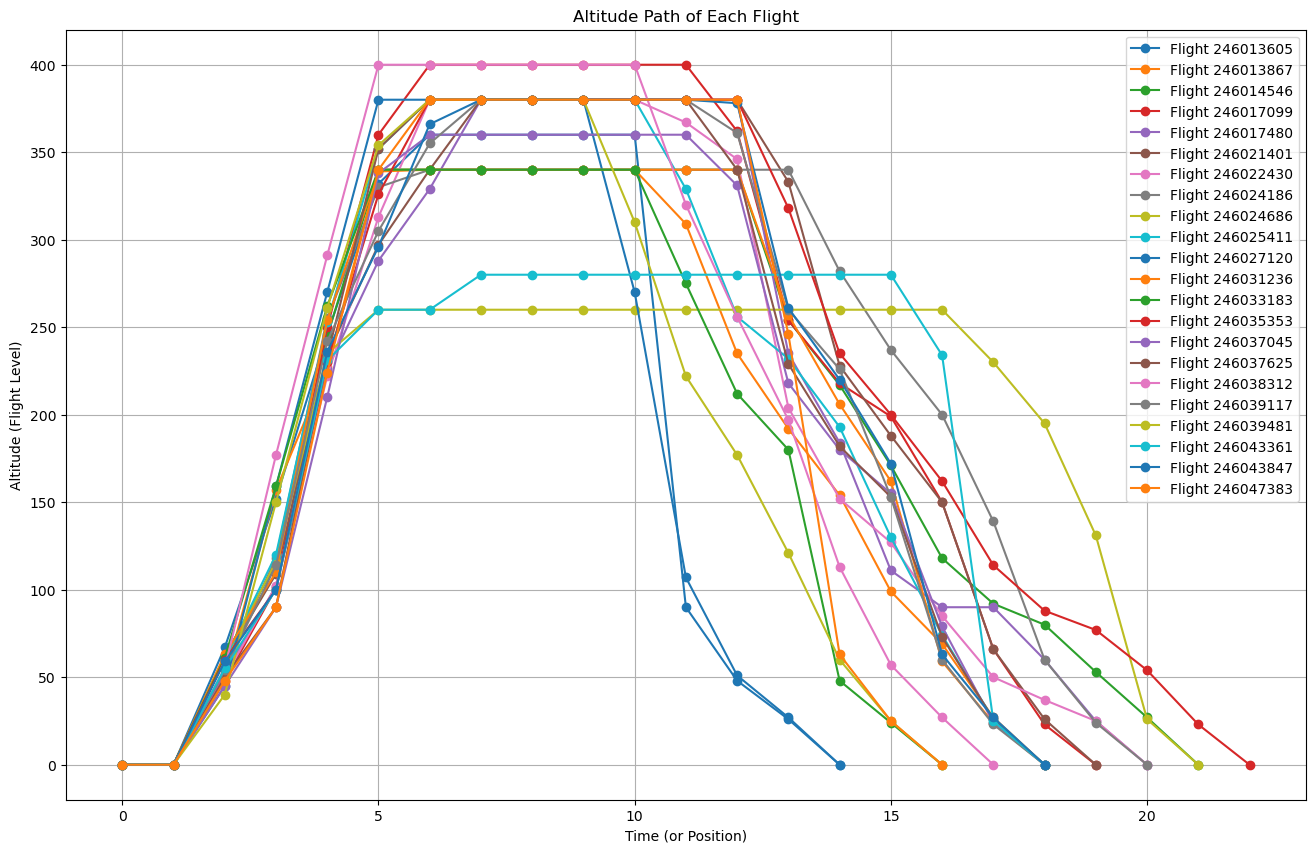

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is already loaded and contains columns 'flight number' and 'Flight_Level'
# Modify column names based on your actual dataset
df = pd.read_csv('ENTC_ENGM_actual_modified.csv')

# Group by 'flight number' and collect the altitude data for each flight
altitude_data_by_flight = df.groupby('ECTRL_ID')['Flight_Level'].apply(list)

# Plot the altitude path for each flight
plt.figure(figsize=(16,10))

for flight_number, altitudes in altitude_data_by_flight.items():
    plt.plot(altitudes, marker='o', linestyle='-', label=f'Flight {flight_number}')

plt.xlabel('Time (or Position)')
plt.ylabel('Altitude (Flight Level)')
plt.title('Altitude Path of Each Flight')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
pip install datetime

Note: you may need to restart the kernel to use updated packages.


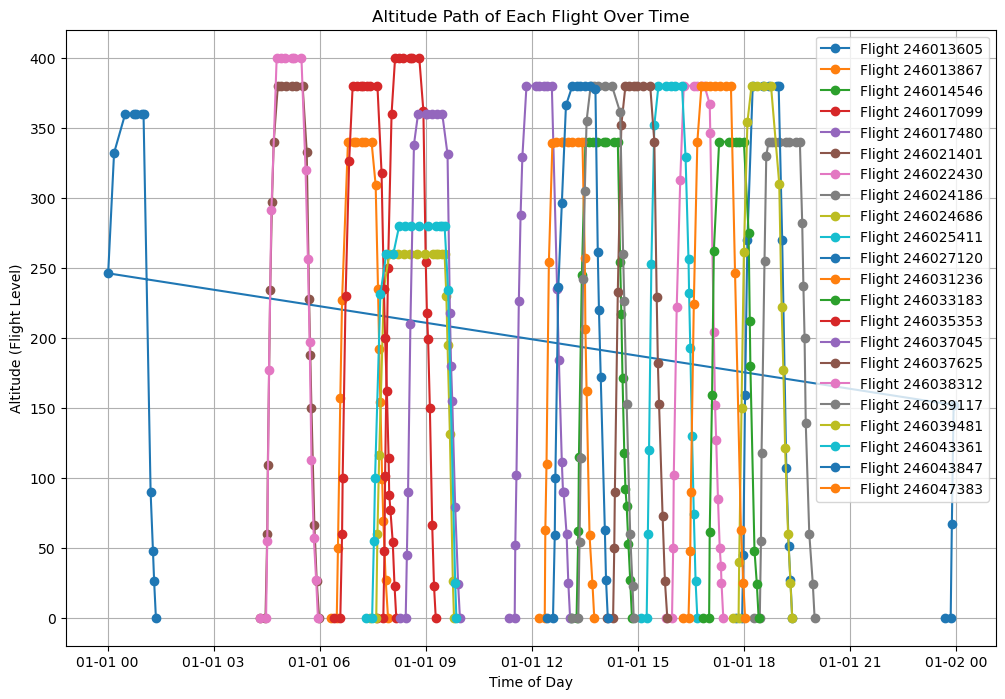

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Assuming your DataFrame is already loaded and contains columns 'flight number', 'Flight_Level', and 'time'
# Modify column names based on your actual dataset
df = pd.read_csv('ENTC_ENGM_actual_modified.csv')

# Convert 'time' column to datetime format
# Adjust the column name and format based on your actual dataset
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

# Group by 'flight number' and collect the altitude and time data for each flight
data_by_flight = df.groupby('ECTRL_ID')[['time', 'Flight_Level']].apply(lambda x: x.to_dict(orient='list')).to_dict()

# Plot the altitude path for each flight with a time-based x-axis
plt.figure(figsize=(12, 8))

for flight_number, data in data_by_flight.items():
    plt.plot(data['time'], data['Flight_Level'], marker='o', linestyle='-', label=f'Flight {flight_number}')

plt.xlabel('Time of Day')
plt.ylabel('Altitude (Flight Level)')
plt.title('Altitude Path of Each Flight Over Time')
plt.legend()
plt.grid(True)
plt.show()


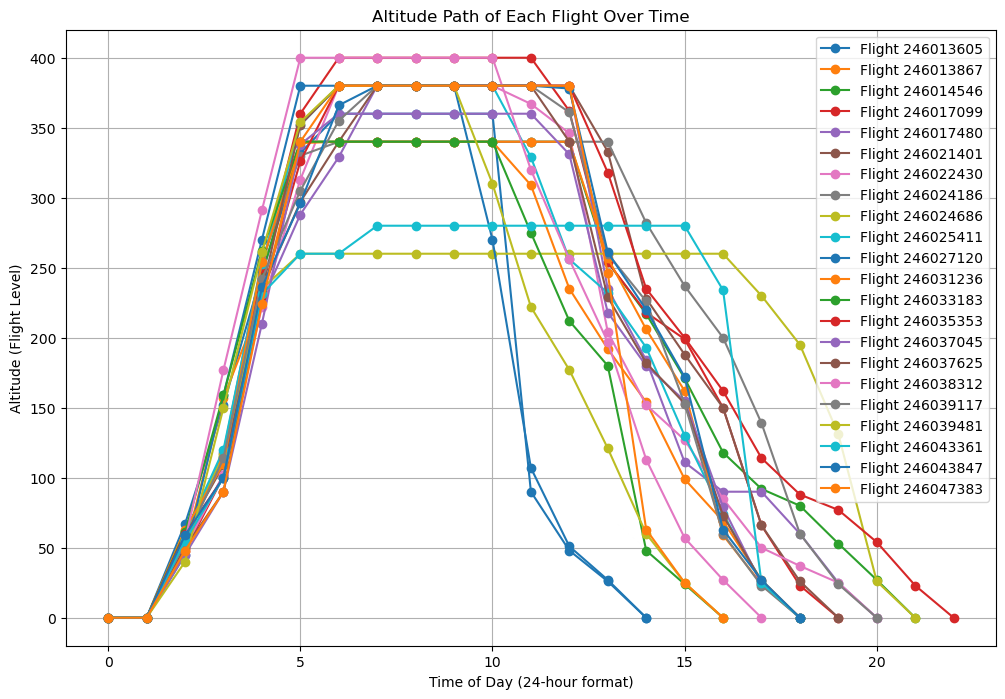

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is already loaded and contains columns 'flight number', 'Flight_Level', and 'time'
# Modify column names based on your actual dataset
df = pd.read_csv('ENTC_ENGM_actual_modified.csv')

# Plot the altitude path for each flight with a time-based x-axis
plt.figure(figsize=(12, 8))

for flight_number, flight_data in df.groupby('ECTRL_ID'):
    plt.plot(flight_data['Sequence_Number'], flight_data['Flight_Level'], marker='o', linestyle='-', label=f'Flight {flight_number}')

plt.xlabel('Time of Day (24-hour format)')
plt.ylabel('Altitude (Flight Level)')
plt.title('Altitude Path of Each Flight Over Time')
plt.legend()
plt.grid(True)
plt.show()


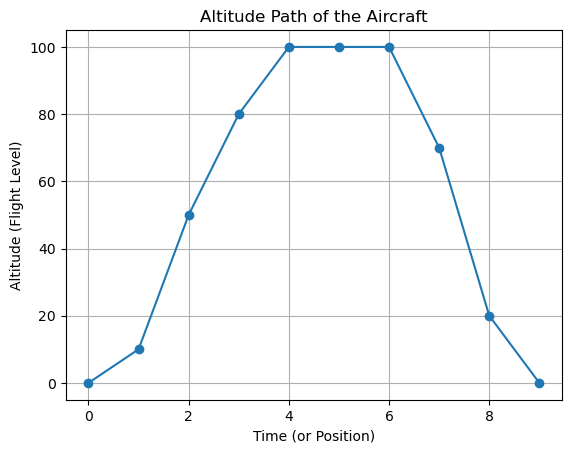

In [14]:
import matplotlib.pyplot as plt

# Example altitude data
altitude_data = [0, 10, 50, 80, 100, 100, 100, 70, 20, 0]

# Plot the altitude path
plt.plot(altitude_data, marker='o', linestyle='-')
plt.xlabel('Time (or Position)')
plt.ylabel('Altitude (Flight Level)')
plt.title('Altitude Path of the Aircraft')
plt.grid(True)
plt.show()


/Users/ioanvalentinvisinescu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


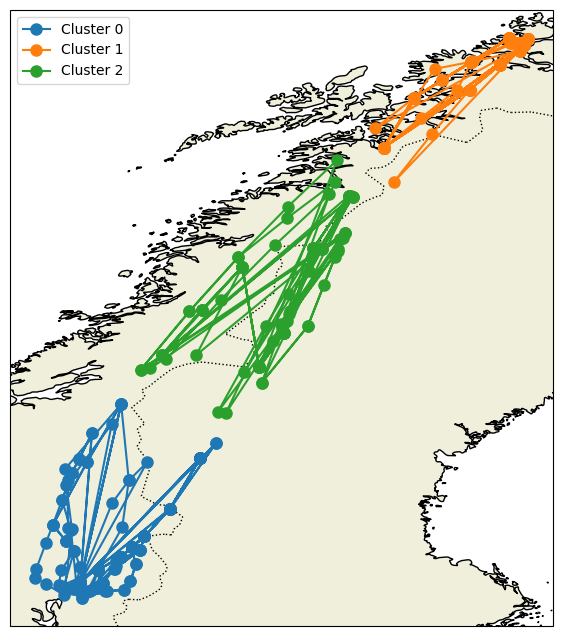

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming your DataFrame is already loaded and contains columns 'Latitude' and 'Longitude'
# Modify column names based on your actual dataset
df = pd.read_csv('ENTC_ENGM_actual_modified.csv')
coordinates = df[['Latitude', 'Longitude']]

# Use k-means clustering to identify flight path patterns
num_clusters = 3  # You can adjust the number of clusters based on your data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(coordinates)

# Plot the clustered flight paths
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 8))

# Plot each cluster with a different color
for cluster_label in range(num_clusters):
    cluster_data = df[df['cluster'] == cluster_label]
    x = cluster_data['Latitude'].tolist()
    y = cluster_data['Longitude'].tolist()
    ax.plot(y, x, marker='o', linestyle='-', markersize=8, label=f'Cluster {cluster_label}')

# Add country borders for reference
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1, edgecolor='black')

# Set labels for each axis
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a legend
ax.legend()

# Show the plot
plt.show()


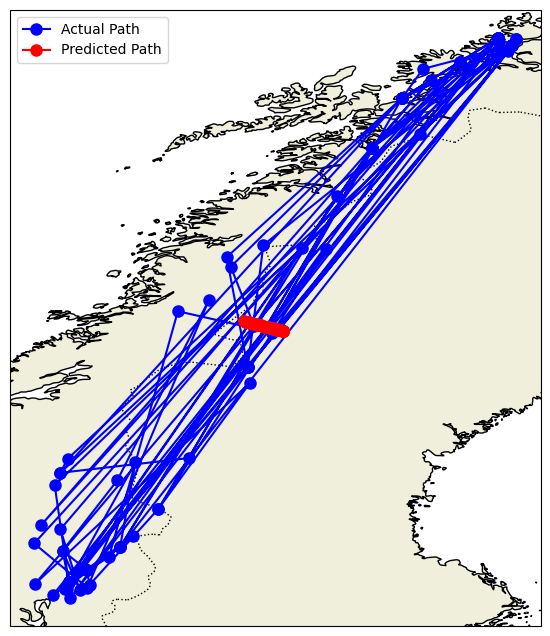

In [20]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming your DataFrame is already loaded and contains columns 'Latitude', 'Longitude', and 'Altitude'
# Modify column names based on your actual dataset
df = pd.read_csv('ENTC_ENGM_actual_modified.csv')

# Select features (Altitude) and target variables (Latitude and Longitude)
X = df[['Flight_Level']]
y_latitude = df['Lon']
y_longitude = df['Longitude']

# Split the data into training and testing sets
X_train, X_test, y_lat_train, y_lat_test, y_lon_train, y_lon_test = train_test_split(X, y_latitude, y_longitude, test_size=0.2, random_state=42)

# Train linear regression models for latitude and longitude
model_latitude = LinearRegression()
model_longitude = LinearRegression()

model_latitude.fit(X_train, y_lat_train)
model_longitude.fit(X_train, y_lon_train)

# Predict latitude and longitude for test data
y_lat_pred = model_latitude.predict(X_test)
y_lon_pred = model_longitude.predict(X_test)

# Plot the predicted and actual flight paths
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 8))

# Plot actual paths
ax.plot(y_lon_test, y_lat_test, marker='o', linestyle='-', color='blue', markersize=8, label='Actual Path')

# Plot predicted paths
ax.plot(y_lon_pred, y_lat_pred, marker='o', linestyle='-', color='red', markersize=8, label='Predicted Path')

# Add country borders for reference
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1, edgecolor='black')

# Set labels for each axis
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [ ]:
pip install tensorflow keras

In [ ]:
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming your DataFrame is already loaded and contains columns 'Latitude', 'Longitude', and 'Altitude'
# Modify column names based on your actual dataset
df = pd.read_csv('ENTC_ENGM_actual_modified.csv')

# Select features (Altitude) and target variables (Latitude and Longitude)
X = df[['Flight_Level']]
y = df[['Longitude', 'Latitude']]

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Create sequences for the LSTM model
sequence_length = 25  # Adjust as needed
X_sequence, y_sequence = [], []

for i in range(len(X_scaled) - sequence_length):
    X_sequence.append(X_scaled[i:i+sequence_length, 0])
    y_sequence.append(y_scaled[i+sequence_length])

X_sequence, y_sequence = np.array(X_sequence), np.array(y_sequence)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sequence, y_sequence, test_size=0.2, random_state=42)

# Reshape data for LSTM input (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=2))  # Two outputs for latitude and longitude

model.compile(optimizer='SGD', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Predict trajectory for the test set
y_pred_scaled = model.predict(X_test)

# Inverse transform to get original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_actual = scaler_y.inverse_transform(y_test)

# Plot the predicted and actual flight paths
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 8))

# Plot actual paths
ax.plot(y_actual[:, 1], y_actual[:, 0], marker='o', linestyle='-', color='blue', markersize=8, label='Actual Path')

# Plot predicted paths
ax.plot(y_pred[:, 1], y_pred[:, 0], marker='o', linestyle='-', color='red', markersize=8, label='Predicted Path')

# Add country borders for reference
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1, edgecolor='black')

# Set labels for each axis
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a legend
ax.legend()

# Show the plot
plt.show()


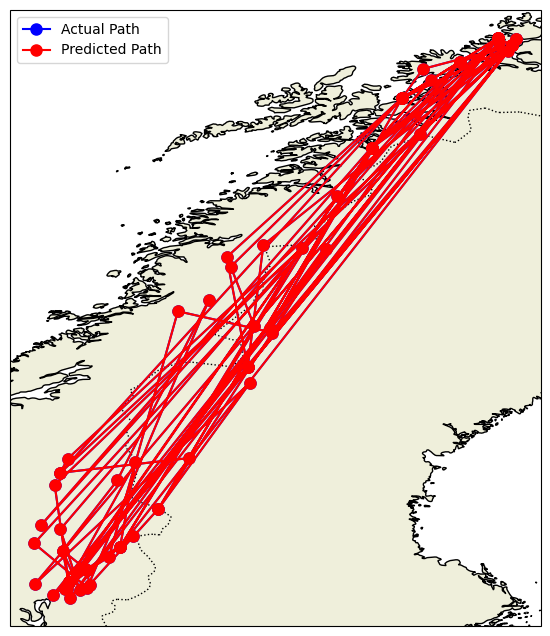

In [21]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming your DataFrame is already loaded and contains columns 'Latitude', 'Longitude'
# Modify column names based on your actual dataset
df = pd.read_csv('ENTC_ENGM_actual_modified.csv')

# Select features (Latitude and Longitude) for training the model
X = df[['Latitude', 'Longitude']]

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Train linear regression models for latitude and longitude
model_latitude = LinearRegression()
model_longitude = LinearRegression()

model_latitude.fit(X_train, X_train['Latitude'])
model_longitude.fit(X_train, X_train['Longitude'])

# Predict latitude and longitude for test data
y_lat_pred = model_latitude.predict(X_test)
y_lon_pred = model_longitude.predict(X_test)

# Plot the predicted and actual flight paths
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 8))

# Plot actual paths
ax.plot(X_test['Longitude'], X_test['Latitude'], marker='o', linestyle='-', color='blue', markersize=8, label='Actual Path')

# Plot predicted paths
ax.plot(y_lon_pred, y_lat_pred, marker='o', linestyle='-', color='red', markersize=8, label='Predicted Path')

# Add country borders for reference
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1, edgecolor='black')

# Set labels for each axis
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a legend
ax.legend()

# Show the plot
plt.show()


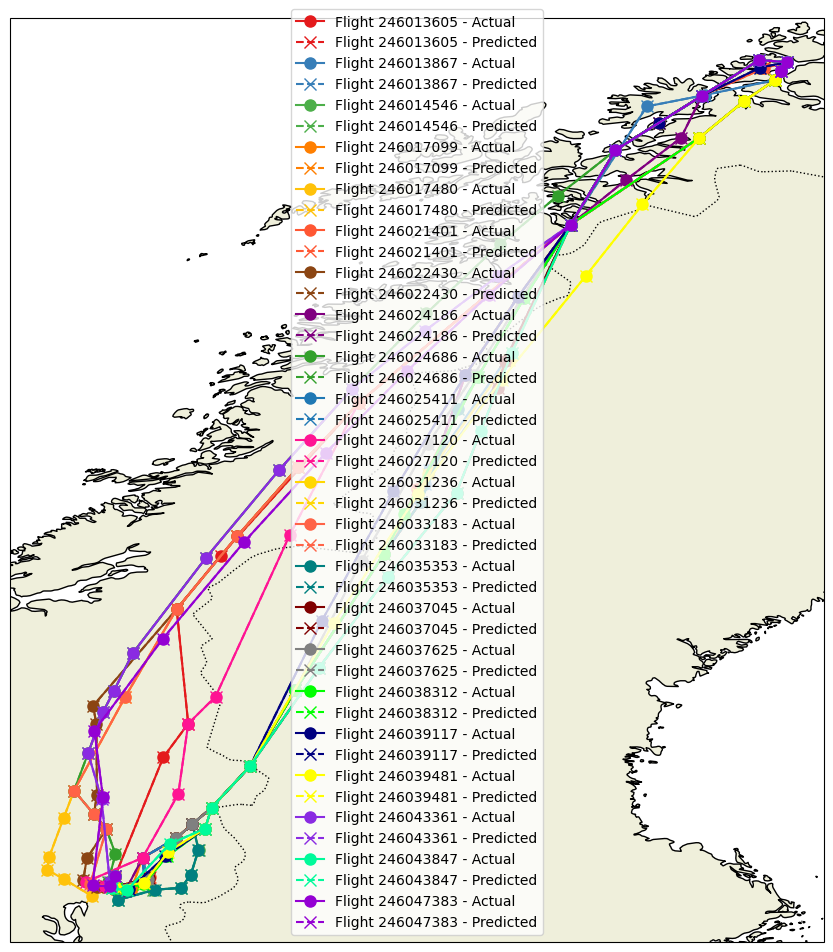

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

# Assuming your DataFrame is already loaded and contains columns 'Latitude' and 'Longitude'
# Modify column names based on your actual dataset
df_list = [df[df['ECTRL_ID'] == flight] for flight in df['ECTRL_ID'].unique()]

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(16,12))

# Define a list of colors for each trajectory
distinct_colors = [
    '#E41A1C', '#377EB8', '#4DAF4A', '#FF7F00', '#FFC20A',
    '#FF5733', '#8B4513', '#800080', '#33A02C', '#1F78B4',
    '#FF1493', '#FFD700', '#FF6347', '#008080', '#800000',
    '#808080', '#00FF00', '#000080', '#FFFF00', '#8A2BE2',
    '#00FA9A', '#9400D3', '#20B2AA'
]

# Plot each trajectory with a different color
for i, flight_df in enumerate(df_list):
    x = flight_df['Latitude'].tolist()
    y = flight_df['Longitude'].tolist()

    # Create a Decision Tree Regressor
    model_latitude = DecisionTreeRegressor()
    model_longitude = DecisionTreeRegressor()

    # Train Decision Tree regression models for latitude and longitude
    model_latitude.fit(np.array(y).reshape(-1, 1), x)
    model_longitude.fit(np.array(x).reshape(-1, 1), y)

    # Generate predicted points along the trajectory
    y_pred = model_longitude.predict(np.array(x).reshape(-1, 1))
    x_pred = model_latitude.predict(np.array(y).reshape(-1, 1))

    col = distinct_colors[i % len(distinct_colors)]  # Cycle through colors if more trajectories than colors
    flight_number = flight_df['ECTRL_ID'].iloc[0]  # Take the first flight number in the group

    ax.plot(y, x, marker='o', linestyle='-', color=col, markersize=8, label=f'Flight {flight_number} - Actual')
    ax.plot(y_pred, x_pred, marker='x', linestyle='--', color=col, markersize=8, label=f'Flight {flight_number} - Predicted')

# Add country borders for reference
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1, edgecolor='black')

# Set labels for each axis
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [28]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


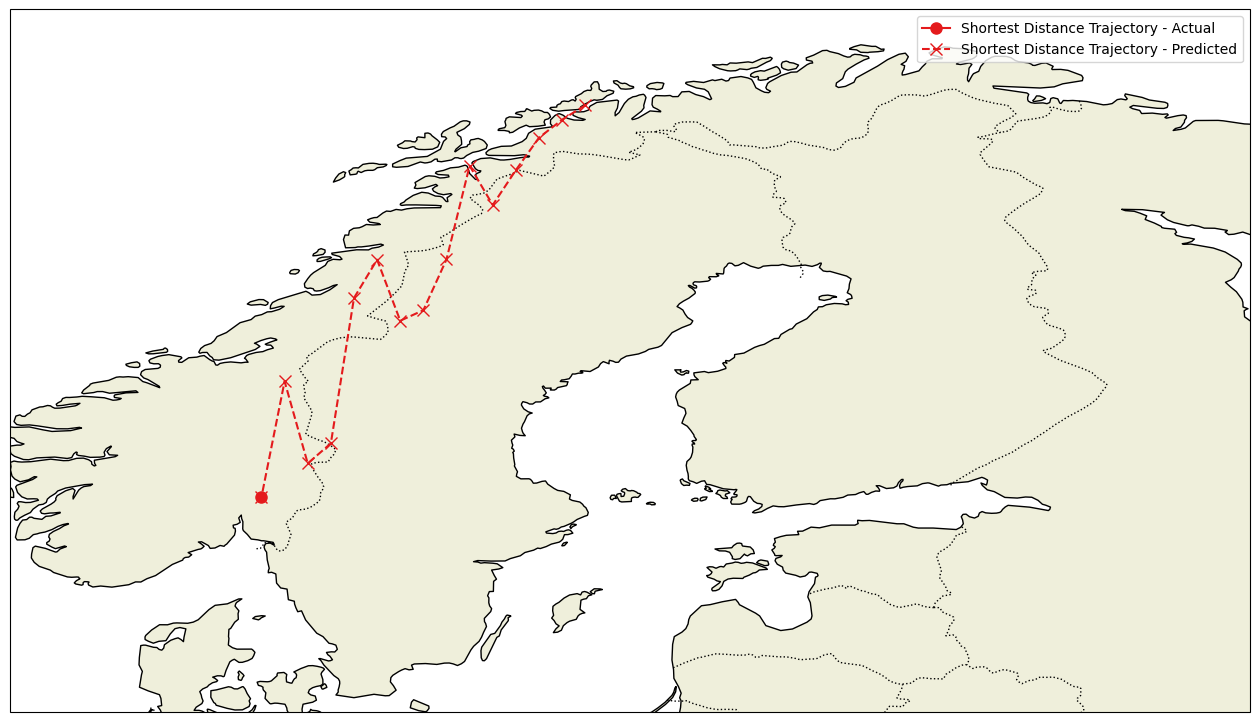

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics.pairwise import haversine_distances
from haversine import Unit
import pandas as pd

# Assuming your DataFrame is already loaded and contains columns 'Latitude' and 'Longitude'
# Modify column names based on your actual dataset
df_list = [df[df['ECTRL_ID'] == flight] for flight in df['ECTRL_ID'].unique()]

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(16, 12))

# Define a list of colors for each trajectory
distinct_colors = [
    '#E41A1C', '#377EB8', '#4DAF4A', '#FF7F00', '#FFC20A',
    '#FF5733', '#8B4513', '#800080', '#33A02C', '#1F78B4',
    '#FF1493', '#FFD700', '#FF6347', '#008080', '#800000',
    '#808080', '#00FF00', '#000080', '#FFFF00', '#8A2BE2',
    '#00FA9A', '#9400D3', '#20B2AA'
]

# Calculate the start and end points for all flights
start_points = [(flight_df['Latitude'].iloc[0], flight_df['Longitude'].iloc[0]) for flight_df in df_list]
end_points = [(flight_df['Latitude'].iloc[-1], flight_df['Longitude'].iloc[-1]) for flight_df in df_list]

# Determine the start and end points for the shortest distance trajectory
shortest_distance_index = np.argmin(haversine_distances(np.array(start_points), np.array(end_points)))
start_point = start_points[shortest_distance_index]
end_point = end_points[shortest_distance_index]

# Calculate the great-circle distance between start and end points in kilometers
great_circle_distance_km = haversine_distances([start_point, end_point]) * 6371000 / 1000  # in kilometers

# Train a Decision Tree regression model for latitude and longitude
model_latitude = DecisionTreeRegressor()
model_longitude = DecisionTreeRegressor()

# Concatenate all flight data for training
train_data = pd.concat([flight_df[['Latitude', 'Longitude']] for flight_df in df_list], axis=0)

# Train Decision Tree regression models for latitude and longitude
model_latitude.fit(train_data['Longitude'].values.reshape(-1, 1), train_data['Latitude'].values)
model_longitude.fit(train_data['Latitude'].values.reshape(-1, 1), train_data['Longitude'].values)

# Generate predicted points along the shortest distance trajectory
y_pred = np.linspace(start_point[1], end_point[1], num=len(df_list[shortest_distance_index]['Latitude']))
x_pred = model_latitude.predict(y_pred.reshape(-1, 1))

# Plot the actual shortest distance trajectory
col = distinct_colors[shortest_distance_index % len(distinct_colors)]
ax.plot(end_point[1], end_point[0], marker='o', color=col, markersize=8, label=f'Shortest Distance Trajectory - Actual')
ax.plot(y_pred, x_pred, marker='x', linestyle='--', color=col, markersize=8, label=f'Shortest Distance Trajectory - Predicted')

# Add country borders for reference
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1, edgecolor='black')

# Set zoom level by specifying longitude and latitude boundaries
ax.set_extent([5, 35, 55, 72], crs=ccrs.PlateCarree())  # Adjust the values based on your desired zoom level for Norway

# Set labels for each axis
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a legend
ax.legend()

# Show the plot
plt.show()



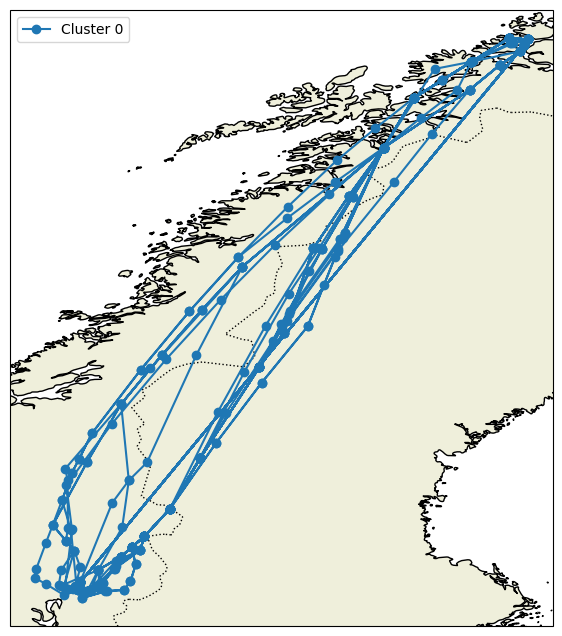

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import haversine_distances
from haversine import Unit
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming your DataFrame is already loaded and contains columns 'Latitude' and 'Longitude'
# Modify column names based on your actual dataset
df_list = [df[df['ECTRL_ID'] == flight] for flight in df['ECTRL_ID'].unique()]

# Convert each trajectory to a DataFrame
df_trajectories = [pd.DataFrame({'Latitude': flight_df['Latitude'], 'Longitude': flight_df['Longitude']}) for flight_df in df_list]

# Concatenate all trajectory DataFrames for clustering
trajectory_data = pd.concat(df_trajectories, ignore_index=True)

# Convert latitude and longitude to radians for haversine distance calculation
trajectory_data_rad = np.radians(trajectory_data[['Latitude', 'Longitude']])

# Use DBSCAN for trajectory clustering
dbscan = DBSCAN(eps=0.1, min_samples=10, metric='haversine')
clusters = dbscan.fit_predict(trajectory_data_rad)

# Visualize the clustered trajectories on a map
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 8))

# Plot each trajectory with a different color based on the cluster assignment
for cluster_label in np.unique(clusters):
    cluster_mask = (clusters == cluster_label)
    ax.plot(trajectory_data.loc[cluster_mask, 'Longitude'], trajectory_data.loc[cluster_mask, 'Latitude'], marker='o', label=f'Cluster {cluster_label}', transform=ccrs.PlateCarree())

# Add land and border features
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1, edgecolor='black')

# Set labels for each axis
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a legend
ax.legend()

# Show the plot
plt.show()



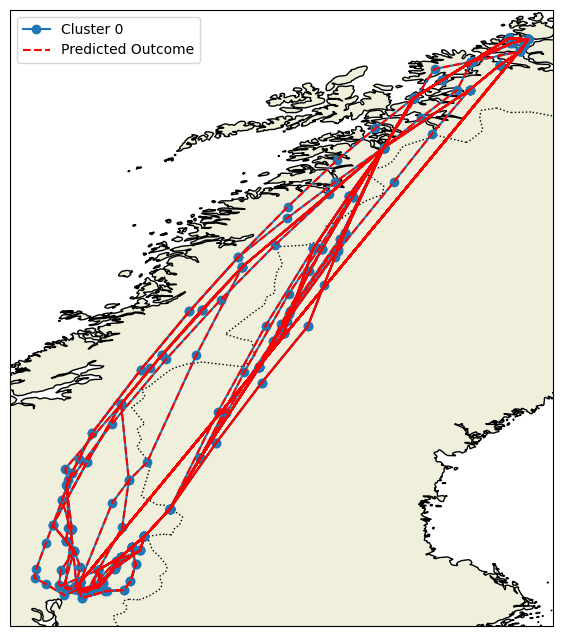

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import haversine_distances
from haversine import Unit
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming your DataFrame is already loaded and contains columns 'Latitude' and 'Longitude'
# Modify column names based on your actual dataset
df_list = [df[df['ECTRL_ID'] == flight] for flight in df['ECTRL_ID'].unique()]

# Convert each trajectory to a DataFrame
df_trajectories = [pd.DataFrame({'Latitude': flight_df['Latitude'], 'Longitude': flight_df['Longitude']}) for flight_df in df_list]

# Concatenate all trajectory DataFrames for clustering
trajectory_data = pd.concat(df_trajectories, ignore_index=True)

# Convert latitude and longitude to radians for haversine distance calculation
trajectory_data_rad = np.radians(trajectory_data[['Latitude', 'Longitude']])

# Use DBSCAN for trajectory clustering
dbscan = DBSCAN(eps=0.1, min_samples=10, metric='haversine')
clusters = dbscan.fit_predict(trajectory_data_rad)

# Visualize the clustered trajectories on a map
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 8))

# Plot each trajectory with a different color based on the cluster assignment
for cluster_label in np.unique(clusters):
    cluster_mask = (clusters == cluster_label)
    ax.plot(trajectory_data.loc[cluster_mask, 'Longitude'], trajectory_data.loc[cluster_mask, 'Latitude'], marker='o', label=f'Cluster {cluster_label}', transform=ccrs.PlateCarree())

# Add land and border features
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1, edgecolor='black')

# Set labels for each axis
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Predicted outcomes for each cluster
predicted_outcomes = dbscan.labels_

# Plot the predicted outcome trajectory in a different style (e.g., dashed line)
predicted_outcome_mask = (predicted_outcomes != -1)  # Ignore noise points (-1)
ax.plot(trajectory_data.loc[predicted_outcome_mask, 'Longitude'], trajectory_data.loc[predicted_outcome_mask, 'Latitude'], linestyle='--', color='red', transform=ccrs.PlateCarree(), label='Predicted Outcome')

# Add a legend
ax.legend()

# Show the plot
plt.show()


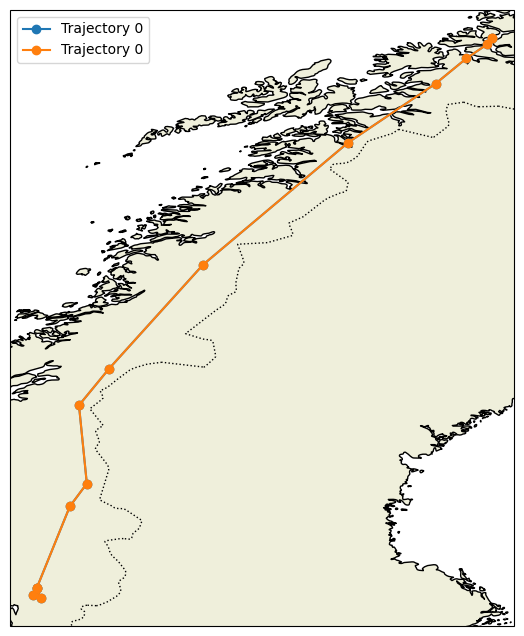

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import haversine_distances
from haversine import Unit
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# Assuming your DataFrame is already loaded and contains columns 'Latitude' and 'Longitude'
# Modify column names based on your actual dataset
df_list = [df[df['ECTRL_ID'] == flight] for flight in df['ECTRL_ID'].unique()]

# Convert each trajectory to a DataFrame
df_trajectories = [pd.DataFrame({'Latitude': flight_df['Latitude'], 'Longitude': flight_df['Longitude']}) for flight_df in df_list]

# Calculate pairwise distances between trajectories
pairwise_distances = np.zeros((len(df_trajectories), len(df_trajectories)))

for i in range(len(df_trajectories)):
    for j in range(i + 1, len(df_trajectories)):
        trajectory_i = np.radians(df_trajectories[i][['Latitude', 'Longitude']])
        trajectory_j = np.radians(df_trajectories[j][['Latitude', 'Longitude']])
        distance_matrix = haversine_distances(trajectory_i, trajectory_j) * 6371000  # Radius of Earth in meters
        pairwise_distances[i, j] = np.min(distance_matrix)
        pairwise_distances[j, i] = np.min(distance_matrix)

# Find the indices of the pair with the shortest distance
min_distance_indices = np.unravel_index(np.argmin(pairwise_distances), pairwise_distances.shape)


# Visualize the trajectories with the shortest distance on a map
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 8))

# Plot the trajectories with the shortest distance
for idx in min_distance_indices:
    ax.plot(df_trajectories[idx]['Longitude'], df_trajectories[idx]['Latitude'], marker='o', label=f'Trajectory {idx}', transform=ccrs.PlateCarree())

# Add country borders for reference
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1, edgecolor='black')

# Set labels for each axis
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a legend
ax.legend()

# Show the plot
plt.show()


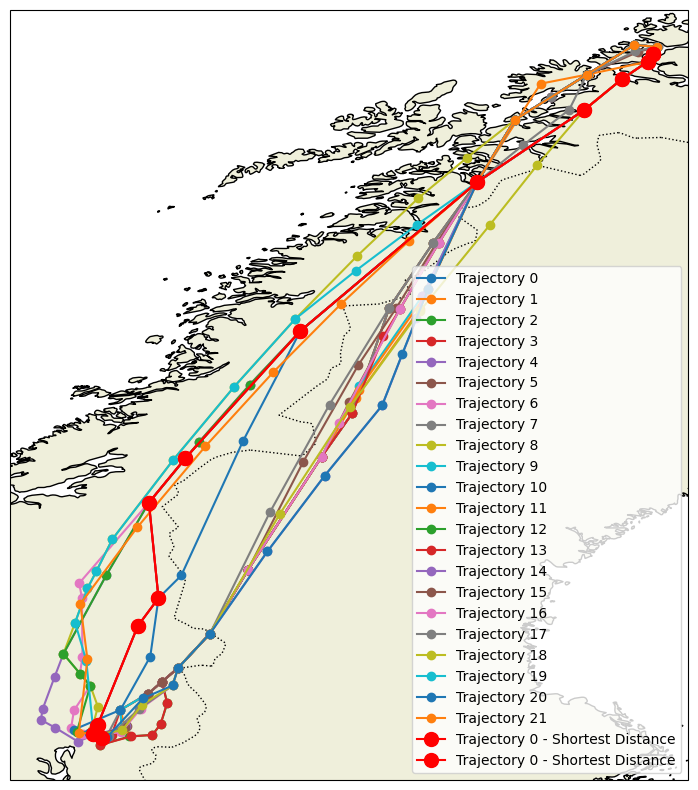

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import haversine_distances
from haversine import Unit
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming your DataFrame is already loaded and contains columns 'Latitude' and 'Longitude'
# Modify column names based on your actual dataset
df_list = [df[df['ECTRL_ID'] == flight] for flight in df['ECTRL_ID'].unique()]

# Convert each trajectory to a DataFrame
df_trajectories = [pd.DataFrame({'Latitude': flight_df['Latitude'], 'Longitude': flight_df['Longitude']}) for flight_df in df_list]

# Calculate pairwise distances between trajectories
pairwise_distances = np.zeros((len(df_trajectories), len(df_trajectories)))

for i in range(len(df_trajectories)):
    for j in range(i + 1, len(df_trajectories)):
        trajectory_i = np.radians(df_trajectories[i][['Latitude', 'Longitude']])
        trajectory_j = np.radians(df_trajectories[j][['Latitude', 'Longitude']])
        distance_matrix = haversine_distances(trajectory_i, trajectory_j) * 6371000  # Radius of Earth in meters
        pairwise_distances[i, j] = np.min(distance_matrix)
        pairwise_distances[j, i] = np.min(distance_matrix)

# Find the indices of the pair with the shortest distance
min_distance_indices = np.unravel_index(np.argmin(pairwise_distances), pairwise_distances.shape)

# Visualize all trajectories with the highlighted pair on a map
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(14, 10))

# Plot all trajectories
for idx, trajectory in enumerate(df_trajectories):
    ax.plot(trajectory['Longitude'], trajectory['Latitude'], marker='o', label=f'Trajectory {idx}', transform=ccrs.PlateCarree())

# Plot the trajectories with the shortest distance
for idx in min_distance_indices:
    ax.plot(df_trajectories[idx]['Longitude'], df_trajectories[idx]['Latitude'], marker='o', label=f'Trajectory {idx} - Shortest Distance', color='red', markersize=10, transform=ccrs.PlateCarree())

# Add country borders for reference
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1, edgecolor='black')

# Set labels for each axis
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming your DataFrame is already loaded and contains columns 'ECTRL_ID', 'Latitude', 'Longitude', and 'Timestamp'
# Modify column names based on your actual dataset
df_list = [df[df['ECTRL_ID'] == flight] for flight in df['ECTRL_ID'].unique()]

# Convert each trajectory to a DataFrame
df_trajectories = [pd.DataFrame({
    'Latitude': flight_df['Latitude'],
    'Longitude': flight_df['Longitude'],
    'time': flight_df['time']
}) for flight_df in df_list]

# Predictive modeling using linear regression
predicted_trajectories = []

for trajectory in df_trajectories:
    X = trajectory[['time']].values.reshape(-1, 1)
    y_latitude = trajectory['Latitude'].values
    y_longitude = trajectory['Longitude'].values

    # Fit linear regression models for latitude and longitude separately
    model_latitude = LinearRegression().fit(X, y_latitude)
    model_longitude = LinearRegression().fit(X, y_longitude)

    # Predict future positions based on the last timestamp in the trajectory
    future_timestamps = np.arange(trajectory['time'].max() + 1, trajectory['time'].max() + 11, 1).reshape(-1, 1)
    predicted_latitude = model_latitude.predict(future_timestamps)
    predicted_longitude = model_longitude.predict(future_timestamps)

    # Create a DataFrame with the predicted trajectory
    predicted_trajectory = pd.DataFrame({
        'Latitude': predicted_latitude,
        'Longitude': predicted_longitude,
        'time': future_timestamps.flatten()
    })

    predicted_trajectories.append(predicted_trajectory)

# Visualize all trajectories with the predicted trajectories on a map
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(14, 10))

# Plot all actual trajectories
for idx, trajectory in enumerate(df_trajectories):
    ax.plot(trajectory['Longitude'], trajectory['Latitude'], marker='o', label=f'Trajectory {idx}', transform=ccrs.PlateCarree())

# Plot the predicted trajectories
for idx, predicted_trajectory in enumerate(predicted_trajectories):
    ax.plot(predicted_trajectory['Longitude'], predicted_trajectory['Latitude'],
            marker='o', label=f'Predicted Trajectory {idx}', linestyle='--', color='green', transform=ccrs.PlateCarree())

# Add country borders for reference
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1, edgecolor='black')

# Set labels for each axis
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a legend
ax.legend()

# Show the plot
plt.show()


ValueError: could not convert string to float: '23:41:00'

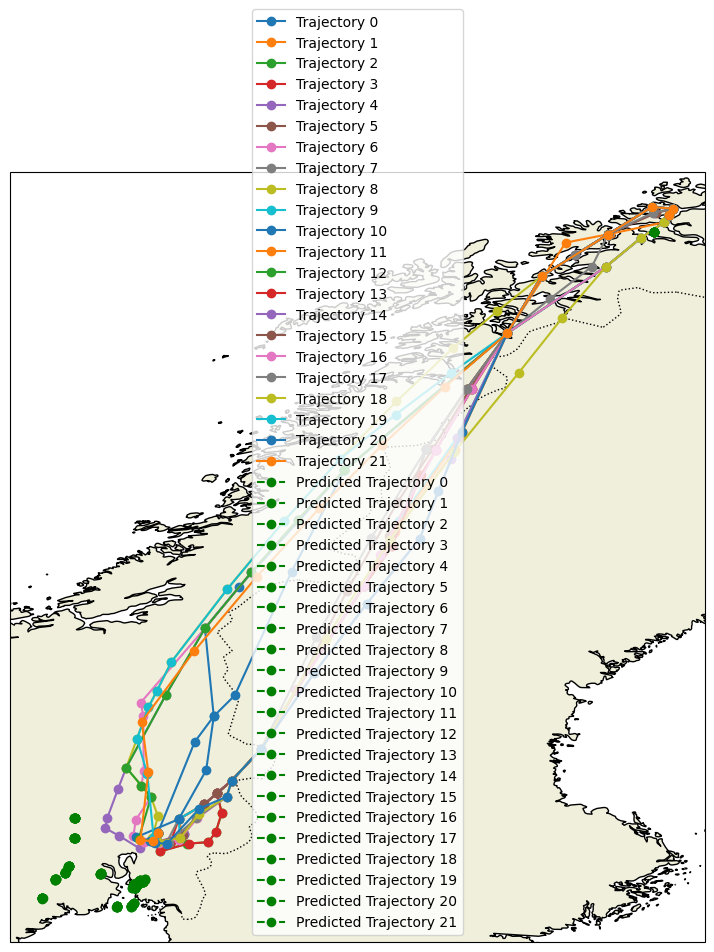

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming your DataFrame is already loaded and contains columns 'ECTRL_ID', 'Latitude', 'Longitude', and 'Time'
# Modify column names based on your actual dataset
df_list = [df[df['ECTRL_ID'] == flight] for flight in df['ECTRL_ID'].unique()]

# Convert each trajectory to a DataFrame
df_trajectories = [pd.DataFrame({
    'Latitude': flight_df['Latitude'],
    'Longitude': flight_df['Longitude'],
    'time': flight_df['time']
}) for flight_df in df_list]

# Convert time to total seconds from the start of each trajectory
for trajectory in df_trajectories:
    trajectory['ElapsedSeconds'] = (pd.to_datetime(trajectory['time'], format='%H:%M:%S') - pd.to_datetime(trajectory['time'].min(), format='%H:%M:%S')).dt.total_seconds()

# Predictive modeling using linear regression
predicted_trajectories = []

for trajectory in df_trajectories:
    X = trajectory[['ElapsedSeconds']].values.reshape(-1, 1)
    y_latitude = trajectory['Latitude'].values
    y_longitude = trajectory['Longitude'].values

    # Fit linear regression models for latitude and longitude separately
    model_latitude = LinearRegression().fit(X, y_latitude)
    model_longitude = LinearRegression().fit(X, y_longitude)

    # Predict future positions based on the last timestamp in the trajectory
    future_elapsed_seconds = np.arange(trajectory['ElapsedSeconds'].max() + 1, trajectory['ElapsedSeconds'].max() + 11, 1).reshape(-1, 1)
    predicted_latitude = model_latitude.predict(future_elapsed_seconds)
    predicted_longitude = model_longitude.predict(future_elapsed_seconds)

    # Create a DataFrame with the predicted trajectory
    predicted_trajectory = pd.DataFrame({
        'Latitude': predicted_latitude,
        'Longitude': predicted_longitude,
        'ElapsedSeconds': future_elapsed_seconds.flatten()
    })

    predicted_trajectories.append(predicted_trajectory)

# Visualize all trajectories with the predicted trajectories on a map
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(14, 10))

# Plot all actual trajectories
for idx, trajectory in enumerate(df_trajectories):
    ax.plot(trajectory['Longitude'], trajectory['Latitude'], marker='o', label=f'Trajectory {idx}', transform=ccrs.PlateCarree())

# Plot the predicted trajectories
for idx, predicted_trajectory in enumerate(predicted_trajectories):
    ax.plot(predicted_trajectory['Longitude'], predicted_trajectory['Latitude'],
            marker='o', label=f'Predicted Trajectory {idx}', linestyle='--', color='green', transform=ccrs.PlateCarree())

# Add country borders for reference
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1, edgecolor='black')

# Set labels for each axis
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [1]:
def print_box(text):
    length = len(text)
    print(f"+{'-' * (length + 2)}+")
    print(f"| {text} |")
    print(f"+{'-' * (length + 2)}+")

# Top Event: Suboptimal Route Choice
print_box("Suboptimal Route Choice")

# Subtrees
subtrees = [
    "Hardware Failure: Failure of the onboard navigation system or sensors.",
    "Software Failure: Bugs, glitches, or errors in the route optimization algorithm.",
    "Data Inaccuracy: Inaccurate or outdated navigation data provided to the system.",
    "Communication Failure: Loss of communication between the aircraft and ground control systems.",
    "Weather Conditions: Unanticipated weather changes affecting the recommended route.",
    "Air Traffic Control (ATC) Issues: Miscommunication or errors in receiving and implementing ATC instructions.",
    "Human Error: Mistakes made by airline staff in inputting or interpreting data.",
    "Cybersecurity Threats: Malicious attacks or cybersecurity breaches affecting the optimal route chooser system."
]

for subtree in subtrees:
    print_box(subtree)

# Mitigation Strategies
mitigation_strategies = [
    "Implement redundancy in critical hardware and software components.",
    "Regularly update and validate navigation data.",
    "Enhance communication protocols and ensure failover mechanisms.",
    "Include real-time weather updates in the decision-making process.",
    "Improve training for airline staff to minimize human errors.",
    "Employ robust cybersecurity measures to safeguard the system."
]

for strategy in mitigation_strategies:
    print_box(strategy)


+-------------------------+
| Suboptimal Route Choice |
+-------------------------+
+------------------------------------------------------------------------+
| Hardware Failure: Failure of the onboard navigation system or sensors. |
+------------------------------------------------------------------------+
+----------------------------------------------------------------------------------+
| Software Failure: Bugs, glitches, or errors in the route optimization algorithm. |
+----------------------------------------------------------------------------------+
+---------------------------------------------------------------------------------+
| Data Inaccuracy: Inaccurate or outdated navigation data provided to the system. |
+---------------------------------------------------------------------------------+
+-----------------------------------------------------------------------------------------------+
| Communication Failure: Loss of communication between the aircraft and ground control